In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Load train dataset
df_train=pd.read_excel('./Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Load test dataset
df_test=pd.read_excel('./Flight_Ticket_Participant_Datasets/Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_train.shape,df_test.shape

((10683, 11), (2671, 10))

In [7]:
# Lets check for null values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
# only 1 null record so can be dropped
df_train = df_train.dropna(axis=0)
df_train.shape

(10682, 11)

In [17]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [18]:
# Check the dataset data types
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [19]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [21]:
# Data description
df_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


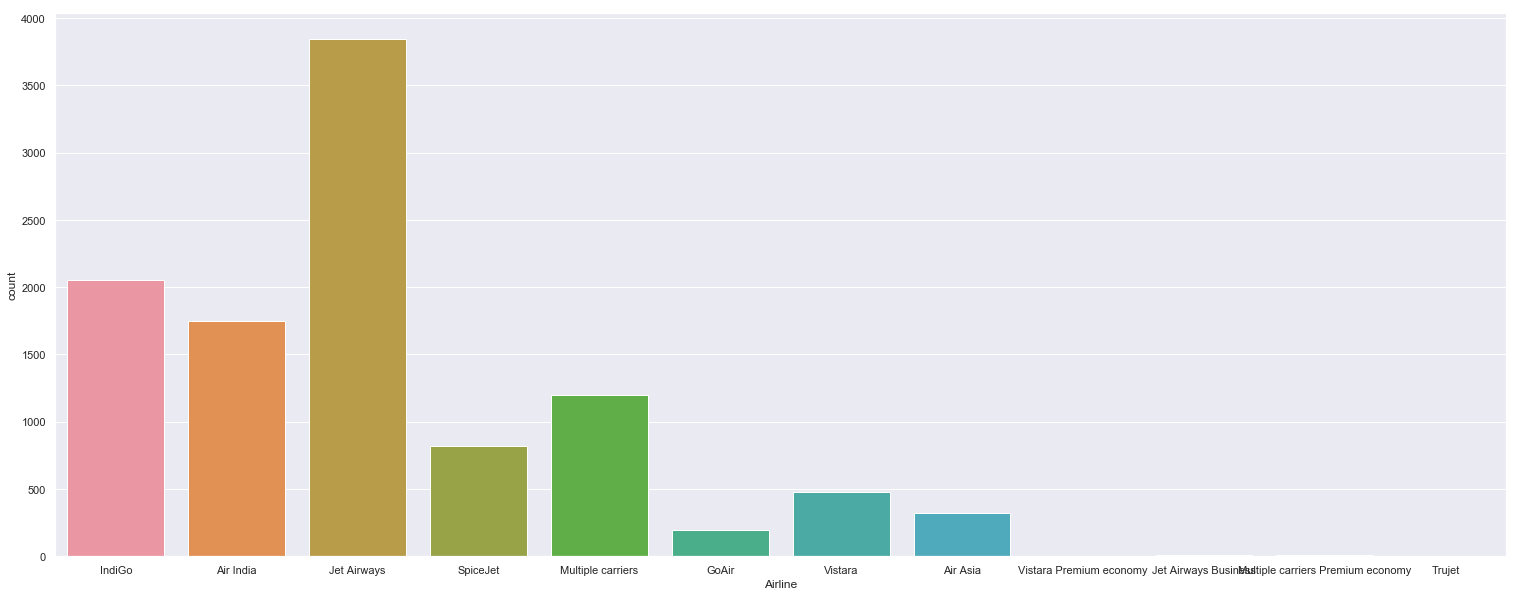

In [24]:
# Analysis of the various airlines 
sns.set(rc={'figure.figsize':(26, 10)})
sns.countplot(df_train['Airline'])

In [25]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
pd.crosstab(df_train['Source'], df_train['Destination'])
# Most number of flights are between Delhi and cochin

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4536,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


In [28]:
# Row of the entire dataset where the price is maximum
df_train.loc[df_train['Price'].idxmax()]

Airline            Jet Airways Business
Date_of_Journey              01/03/2019
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Name: 2924, dtype: object

In [29]:
# Row of the entire dataset where the price is maximum
df_train.loc[df_train['Price'].idxmin()]

Airline                SpiceJet
Date_of_Journey      21/03/2019
Source                   Mumbai
Destination           Hyderabad
Route                 BOM → HYD
Dep_Time                  22:45
Arrival_Time       00:10 22 Mar
Duration                 1h 25m
Total_Stops            non-stop
Additional_Info         No info
Price                      1759
Name: 4066, dtype: object

In [31]:
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

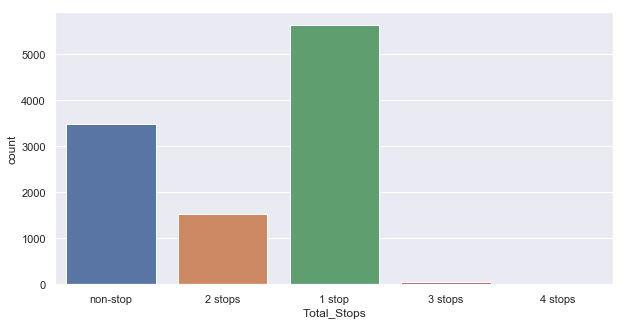

In [33]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(df_train['Total_Stops'])
# Most of the flights have 1 stop

In [34]:
#stats of airlines with total stops
pd.crosstab(df_train['Airline'], df_train['Total_Stops'])

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,
Air Asia,129,9,0,0,181
Air India,540,756,37,1,417
GoAir,102,0,0,0,92
IndiGo,793,19,0,0,1241
Jet Airways,2535,691,0,0,623
Jet Airways Business,4,2,0,0,0
Multiple carriers,1145,43,8,0,0
Multiple carriers Premium economy,13,0,0,0,0
SpiceJet,148,0,0,0,670


#### Feature Engineering

In [35]:
# Format the date of journey
# Add new column day of travel, month of travel,
# year of travel is the same so no need
# Add extra column week day -- 1 for week, day 0 for weekend

df_train['Day_of_Travel']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day
df_test['Day_of_Travel']=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.day

df_train['Month_of_Travel']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month
df_test['Month_of_Travel']=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.month

df_train['Weekday'] = ((pd.DatetimeIndex(df_train.Date_of_Journey).dayofweek) // 5 == 1).astype(int)
df_test['Weekday'] = ((pd.DatetimeIndex(df_test.Date_of_Journey).dayofweek) // 5 == 1).astype(int)

df_train=df_train.drop(columns=['Date_of_Journey'])
df_test=df_test.drop(columns=['Date_of_Journey'])

In [36]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,0


In [37]:
# Format Dep_Time and Arrival_Time

df_train['Depart_Hour']=pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Depart_Minute']=pd.to_datetime(df_train.Dep_Time).dt.minute

df_test['Depart_Hour']=pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Depart_Minute']=pd.to_datetime(df_test.Dep_Time).dt.minute


df_train['Arrival_Hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arrival_Minute']=pd.to_datetime(df_train.Arrival_Time).dt.minute

df_test['Arrival_Hour']=pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arrival_Minute']=pd.to_datetime(df_test.Arrival_Time).dt.minute

df_train=df_train.drop(columns=['Dep_Time'])
df_test=df_test.drop(columns=['Dep_Time'])

df_train=df_train.drop(columns=['Arrival_Time'])
df_test=df_test.drop(columns=['Arrival_Time'])

In [38]:
# Add extra two column to check wheter the journey was at night time or early morning time
# Some flights have less fare at early morning and high price at late night 

df_train['Night_Journey']=(df_train['Depart_Hour']>=20).astype(int)
df_train['Early_Morning_Journey']=((df_train['Depart_Hour']>=4) & (df_train['Depart_Hour']<=8)).astype(int)

df_test['Night_Journey']=(df_train['Depart_Hour']>=20).astype(int)
df_test['Early_Morning_Journey']=((df_train['Depart_Hour']>=4) & (df_train['Depart_Hour']<=8)).astype(int)

In [39]:
# Function to extract hour and minute 

def extract_hour_minute(duration):
    hour=[]
    minute=[]

    for time in duration:
        minu=time.split(' ')
        count=len(minu)
        if count==2:
            h=minu[0].split('h')[0]
            hour.append(int(h))
            m=minu[1].split('m')[0]
            minute.append(int(m))
        elif minu[0][-1]=='m':
            hour.append(0)
            m=minu[0].split('m')[0]
            minute.append(int(m))
           #print(m)    
        elif minu[0][-1]=='h':
            minute.append(0)
            h=minu[0].split('h')[0]
            hour.append(int(h))
           #print(h)
    return hour,minute

In [40]:
# Extract hour and minute and add to new columns

df_train['Travel_Hour'], df_train['Travel_Minute']=extract_hour_minute(df_train['Duration'])
df_test['Travel_Hour'], df_test['Travel_Minute']=extract_hour_minute(df_test['Duration'])

df_train=df_train.drop(columns=['Duration'])
df_test=df_test.drop(columns=['Duration'])

In [41]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey,Travel_Hour,Travel_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,10,1,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,13,15,0,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,4,25,0,0,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,0,18,5,23,30,0,0,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,21,35,0,0,4,45


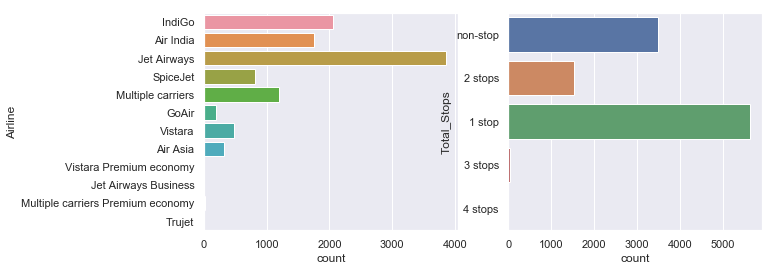

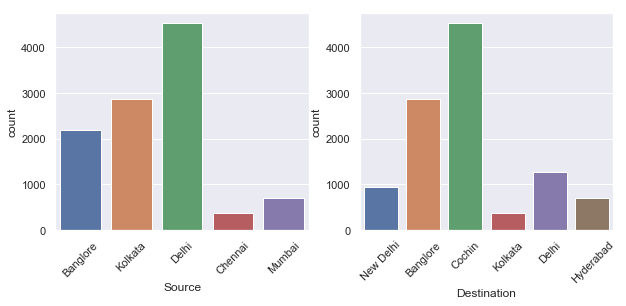

In [42]:
# Categorical data visualization 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(y=df_train['Airline'])
plt.subplot(1,2,2)
sns.countplot(y=df_train['Total_Stops'])
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=df_train['Source'])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x=df_train['Destination'])
plt.xticks(rotation=45)
plt.show()

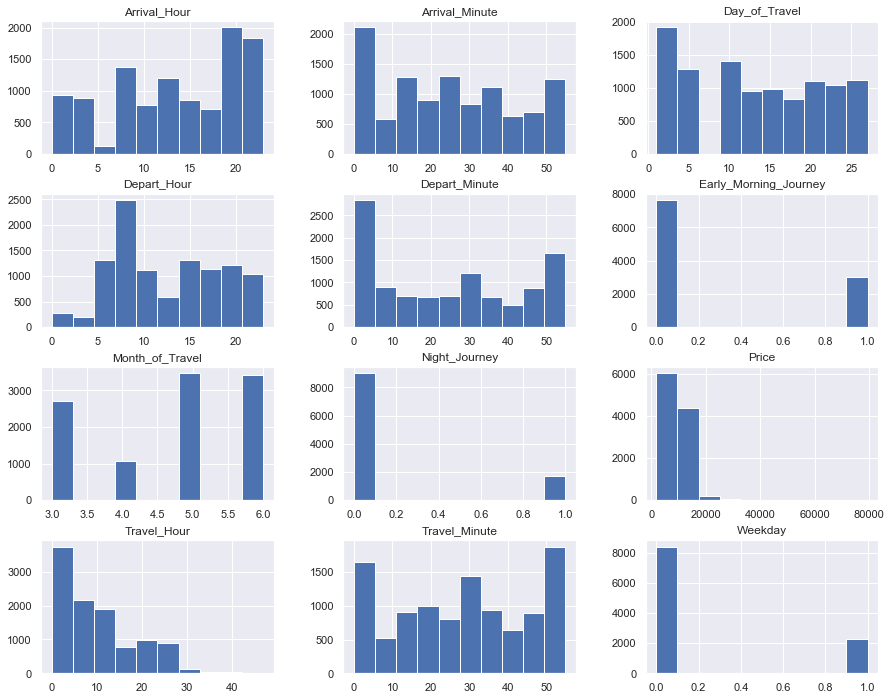

In [46]:
# Histogram to check the data despersion
df_train.hist(figsize=(15,12))
plt.show()

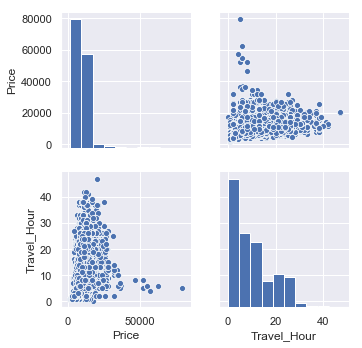

In [47]:
# Check the price and travel hour pair plot
sns.pairplot(data=df_train, vars=['Price','Travel_Hour'])

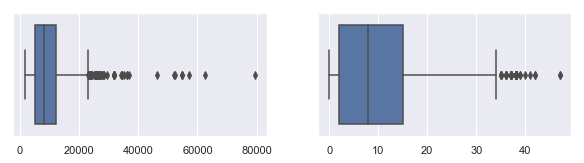

In [48]:
# Box plot to find the outlier
plt.subplot(2,2,1)
sns.boxplot(x=['Price'],data=df_train)
plt.subplot(2,2,2)
sns.boxplot(x=['Travel_Hour'],data=df_train)

5277.0
12373.0
7096.0


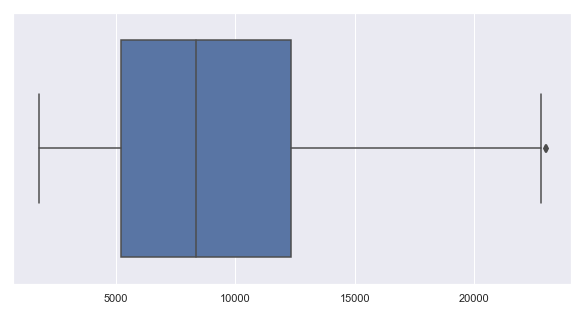

In [49]:
# Price outlier check
Q1=df_train['Price'].quantile(0.25)
Q3=df_train['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

# Price outlier removed
df_train=df_train[~((df_train['Price']>Q3+1.5*IQR)|(df_train['Price']<Q1-1.5*IQR))]
sns.boxplot(x=['Price'],data=df_train)

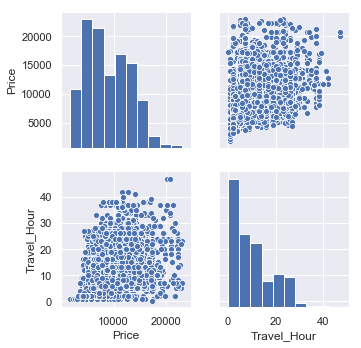

In [50]:
# Check the price and travel hour pair plot after the outliers removed
sns.pairplot(data=df_train,vars=['Price','Travel_Hour'])

In [55]:
# lets check any flight who has very less travel time
df_train[((df_train['Travel_Minute'] < 45) & (df_train['Travel_Hour'] == 0))]
# The below flight has only 5 minutes travel time, which is incorrect

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Early_Morning_Journey,Travel_Hour,Travel_Minute
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,0,16,50,16,55,0,0,0,5


In [58]:
# Remove the incorrect flight details
df_train=df_train[~((df_train['Travel_Minute'] < 45) & (df_train['Travel_Hour']==0))]


In [59]:
# Lets get dummies of source and destination city

df_new=pd.concat([df_train.drop('Source',axis=1),pd.get_dummies(df_train['Source'],prefix='Source')],axis=1)
df_new=pd.concat([df_new.drop('Destination',axis=1),pd.get_dummies(df_new['Destination'],prefix='Destination')],axis=1)
df_train=df_new
df_train.head()

,Airline,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,CCU → NAG → BLR,1 stop,No info,6218,12,5,0,18,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,BLR → NAG → DEL,1 stop,No info,13302,1,3,0,16,50,...,0,0,0,0,0,0,0,0,0,1


In [101]:
# Lets get dummies of source and destination city

df_new=pd.concat([df_test.drop('Source',axis=1),pd.get_dummies(df_test['Source'],prefix='Source')],axis=1)
df_new=pd.concat([df_new.drop('Destination',axis=1),pd.get_dummies(df_new['Destination'],prefix='Destination')],axis=1)
df_test=df_new
df_test.head()

,Airline,Route,Total_Stops,Additional_Info,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,...,Source_1,Source_2,Source_3,Source_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,4,76,0,5,6,6,0,17,30,4,...,0,1,0,0,0,1,0,0,0,0
1,3,65,0,5,12,5,0,6,20,10,...,0,0,1,0,1,0,0,0,0,0
2,4,76,0,3,21,5,0,19,15,19,...,0,1,0,0,0,1,0,0,0,0
3,6,76,0,5,21,5,0,8,0,21,...,0,1,0,0,0,1,0,0,0,0
4,0,16,4,5,24,6,0,23,55,2,...,0,0,0,0,0,0,1,0,0,0


In [60]:
# Columns Airline, Route, Total_Stops, Info can be encode 

#masking of object column
categorial_mask1=df_train.dtypes==object
categorial_mask2=df_test.dtypes==object

#categorical columns
categorical_cols1=df_train.columns[categorial_mask1].tolist()
categorical_cols2=df_test.columns[categorial_mask2].tolist()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le2=LabelEncoder()

df_train[categorical_cols1]=df_train[categorical_cols1].apply(lambda col:le.fit_transform(col))
df_test[categorical_cols2]=df_test[categorical_cols2].apply(lambda col:le2.fit_transform(col))

In [96]:
df_train.shape, df_test.shape

((10587, 27), (2671, 17))

In [61]:
df_train.head()

,Airline,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,18,4,5,3897,24,3,1,22,20,...,0,0,0,0,0,0,0,0,0,1
1,1,82,1,5,7662,1,5,1,5,50,...,0,0,1,0,1,0,0,0,0,0
2,4,116,1,5,13882,9,6,0,9,25,...,0,1,0,0,0,1,0,0,0,0
3,3,89,0,5,6218,12,5,0,18,5,...,0,0,1,0,1,0,0,0,0,0
4,3,29,0,5,13302,1,3,0,16,50,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df_train.dtypes

Airline                  int32
Route                    int32
Total_Stops              int32
Additional_Info          int32
Price                    int64
Day_of_Travel            int64
Month_of_Travel          int64
Weekday                  int32
Depart_Hour              int64
Depart_Minute            int64
Arrival_Hour             int64
Arrival_Minute           int64
Night_Journey            int32
Early_Morning_Journey    int32
Travel_Hour              int64
Travel_Minute            int64
Source_Banglore          uint8
Source_Chennai           uint8
Source_Delhi             uint8
Source_Kolkata           uint8
Source_Mumbai            uint8
Destination_Banglore     uint8
Destination_Cochin       uint8
Destination_Delhi        uint8
Destination_Hyderabad    uint8
Destination_Kolkata      uint8
Destination_New Delhi    uint8
dtype: object

In [64]:
# Lets start modelling
# Split data into X and y
X = df_train.drop("Price", axis=1)
y = df_train["Price"]

In [65]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=37)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8469, 26), (2118, 26), (8469,), (2118,))

We're going to try below machine learning models:

* LinearRegression
* KNeighborsRegressor
* DecisionTreeRegressor
* RandomForestRegressor
* Lasso
* SVR

In [67]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Lasso":Lasso(),
          "Support Vector Regression": SVR()
          }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [68]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.5048305260189638,
 'KNN': 0.7388722170896558,
 'Decision Tree': 0.8731061287160309,
 'Random Forest': 0.9316144056840104,
 'Lasso': 0.5052247625686029,
 'Support Vector Regression': 0.03832160288089348}

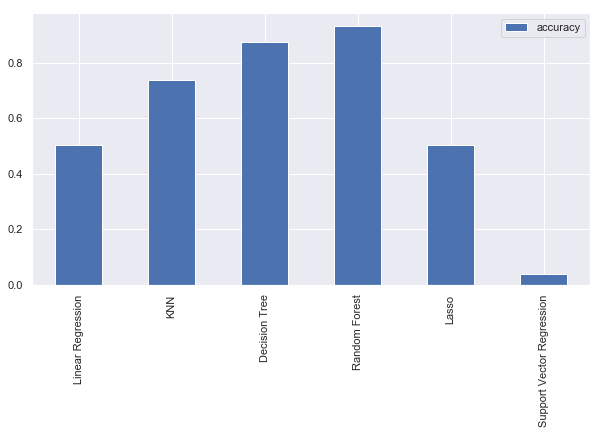

In [78]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

As the accuracy score of KNN, Decision Tree and Random Forest is higher than others we can proceed with these three.

In [84]:
def analyse_model(model):    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("R2 model score: %.2f " % model.score(X_test,y_test))
    print("Mean squared error: %.2f " % mean_squared_error(y_test,pred))
    print("mean_absolute_error: %.2f " % mean_absolute_error(y_test,pred))
    print("explained_variance_score: %.2f " % explained_variance_score(y_test,pred)) 
    print("cross_val_score: %.2f " % cross_val_score(model, X_train, y_train,cv=5).mean())
    print("R2_Score: %.2f " % r2_score(y_test,pred))
    print(pd.DataFrame({'Price':y_test,'Price Predicted':pred}).head(10))

In [79]:
knn=KNeighborsRegressor()
analyse_model(knn)

cross_val_score: 0.70 
R2 model score: 0.74 
Mean squared error: 4247480.44 
mean_absolute_error: 1412.11 
explained_variance_score: 0.74 
R2_Score: 0.74 
      Price  Price Predicted
9415   4030           5760.2
3788  15434           9138.4
1788  10844           9918.0
1521  13611           9286.4
830    7268          10247.8
5532  10482           6711.8
3162   4049           4117.6
1760   4465           4194.4
395    3919           4313.8
7213   3100           2995.0


In [80]:
dtr=DecisionTreeRegressor()
analyse_model(dtr)

cross_val_score: 0.86 
R2 model score: 0.86 
Mean squared error: 2218693.41 
mean_absolute_error: 665.16 
explained_variance_score: 0.86 
R2_Score: 0.86 
      Price  Price Predicted
9415   4030           4030.0
3788  15434          11528.0
1788  10844          10844.0
1521  13611          14871.0
830    7268          10791.0
5532  10482           7725.0
3162   4049           4049.0
1760   4465           4413.0
395    3919           3919.0
7213   3100           2575.0


In [85]:
ada_dtregressor=AdaBoostRegressor()
ada_dtregressor=AdaBoostRegressor(base_estimator=dtr, learning_rate=0.1)
ada_dtregressor.fit(X_train,y_train)
ada_pred = ada_dtregressor.predict(X_test)
analyse_model(ada_dtregressor)

R2 model score: 0.92 
Mean squared error: 1326932.28 
mean_absolute_error: 515.32 
explained_variance_score: 0.92 
cross_val_score: 0.91 
R2_Score: 0.92 
      Price  Price Predicted
9415   4030           4030.0
3788  15434          12704.0
1788  10844          10844.0
1521  13611          14871.0
830    7268          10791.0
5532  10482           7060.0
3162   4049           4049.0
1760   4465           4148.0
395    3919           3971.0
7213   3100           3100.0


In [91]:
rfr = RandomForestRegressor(n_estimators=100)
analyse_model(rfr)

#rf = RandomForestRegressor(random_state = 42)
#from pprint import pprint
# Look at parameters used by our current forest
#print('Parameters currently in use:\n')
#pprint(rf.get_params())

R2 model score: 0.93 
Mean squared error: 1120782.09 
mean_absolute_error: 562.28 
explained_variance_score: 0.93 
cross_val_score: 0.91 
R2_Score: 0.93 
      Price  Price Predicted
9415   4030          4402.78
3788  15434         13523.43
1788  10844         10657.12
1521  13611         13703.50
830    7268         10293.03
5532  10482          7511.98
3162   4049          4089.98
1760   4465          4241.11
395    3919          4050.92
7213   3100          2958.81


In [92]:
ada_rfregressor=AdaBoostRegressor()
ada_rfregressor=AdaBoostRegressor(base_estimator=rfr, learning_rate=0.1)
ada_rfregressor.fit(X_train,y_train)
ada_pred = ada_rfregressor.predict(X_test)
analyse_model(ada_rfregressor)

R2 model score: 0.94 
Mean squared error: 1049130.43 
mean_absolute_error: 566.71 
explained_variance_score: 0.94 
cross_val_score: 0.92 
R2_Score: 0.94 
      Price  Price Predicted
9415   4030      4553.280000
3788  15434     13654.780000
1788  10844     10704.560000
1521  13611     13630.140000
830    7268      9951.713088
5532  10482      7526.450000
3162   4049      4120.440000
1760   4465      4281.320000
395    3919      4080.780000
7213   3100      3012.480000


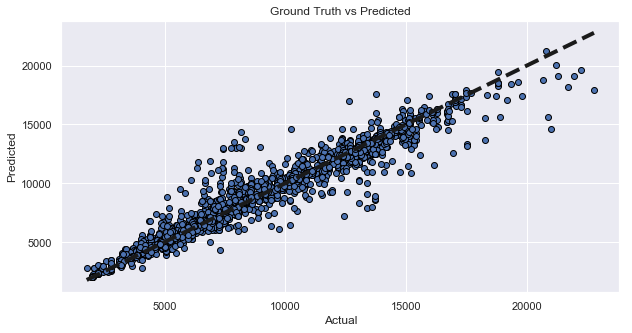

In [93]:
# Lets Visualize the Goodness of the Prediction
fig, ax = plt.subplots()
ax.scatter(y_test, ada_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Note:- Here ada_rfregressor gives highest accuracy 94%

In [102]:
# Load testdataset to our model for prediction
test_pred = ada_rfregressor.predict(df_test)
print(test_pred)

[14688.32    4738.71   11841.36   ... 15930.8375 13168.99    8293.1   ]


In [103]:
# Lets Save the model as pickle in a file
import pickle
filename = 'flight_ticket_prediction.pkl'
pickle.dump(ada_rfregressor, open(filename, 'wb'))